In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Z:\Mtech\Mtech_Projects\Predictive-Modeling-for-Digital-Marketing-Campaign-Performance\Training_data.csv')

In [5]:
df.shape

(1054, 57)

# EDA

In [6]:
df.isna().sum()

date                                     0
company name                             0
spend                                    0
impressions                              0
likecount                                0
commentcount                             0
repostcount                              0
total engagements                        0
conversion                               0
action                                   0
type                                     0
posturl                                  0
postcontent                              0
profileurl                               0
videourl                               833
sharedposturl                          810
created_at                               0
size                                     0
url                                     83
number of faces                          0
face emotion                           760
face position                          760
face area percentage %                   0
objects    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                1054 non-null   object 
 1   company name                        1054 non-null   object 
 2   spend                               1054 non-null   float64
 3   impressions                         1054 non-null   int64  
 4   likecount                           1054 non-null   int64  
 5   commentcount                        1054 non-null   int64  
 6   repostcount                         1054 non-null   int64  
 7   total engagements                   1054 non-null   int64  
 8   conversion                          1054 non-null   int64  
 9   action                              1054 non-null   object 
 10  type                                1054 non-null   object 
 11  posturl                             1054 no

# Exploring the distribution of performance metrics

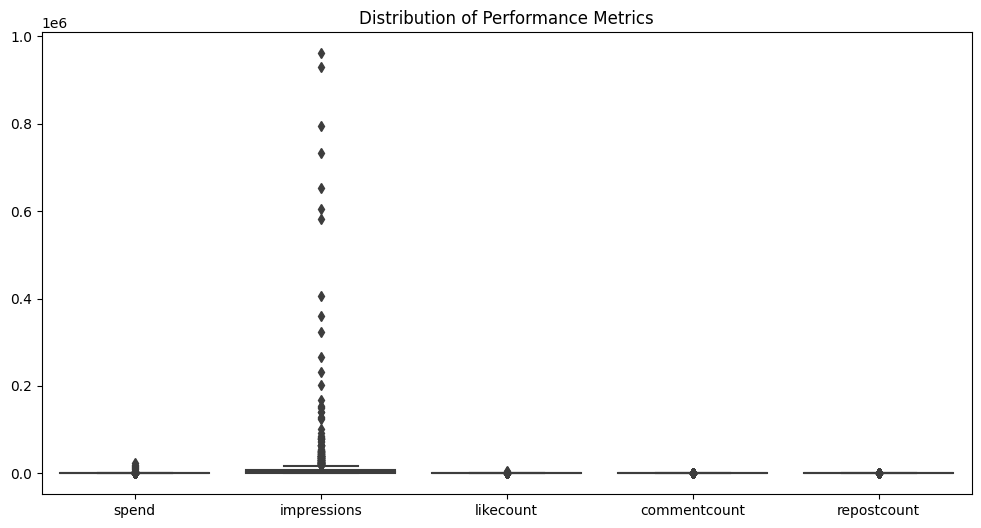

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['spend', 'impressions', 'likecount', 'commentcount', 'repostcount']])
plt.title("Distribution of Performance Metrics")
plt.show()

# # Explore the distribution of creative attributes

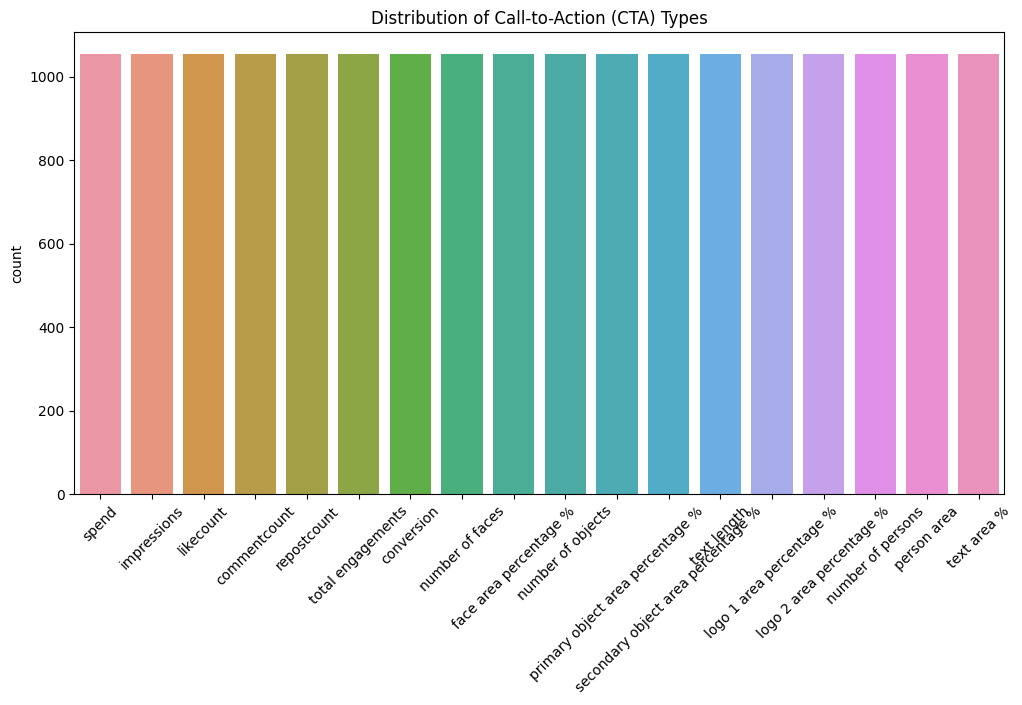

In [11]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df)
plt.title("Distribution of Call-to-Action (CTA) Types")
plt.xticks(rotation=45)
plt.show()

# Correlation matrix to identify relationships

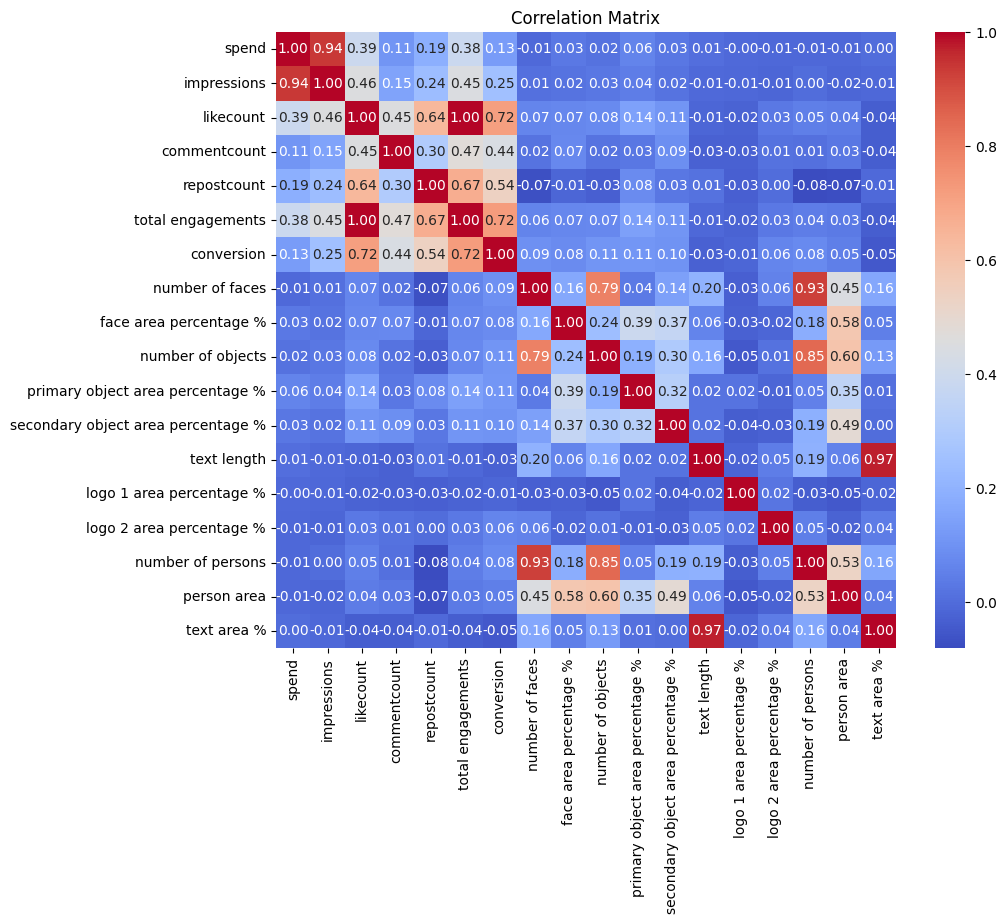

In [12]:

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Scatter plot to visualize relationships between two numerical features

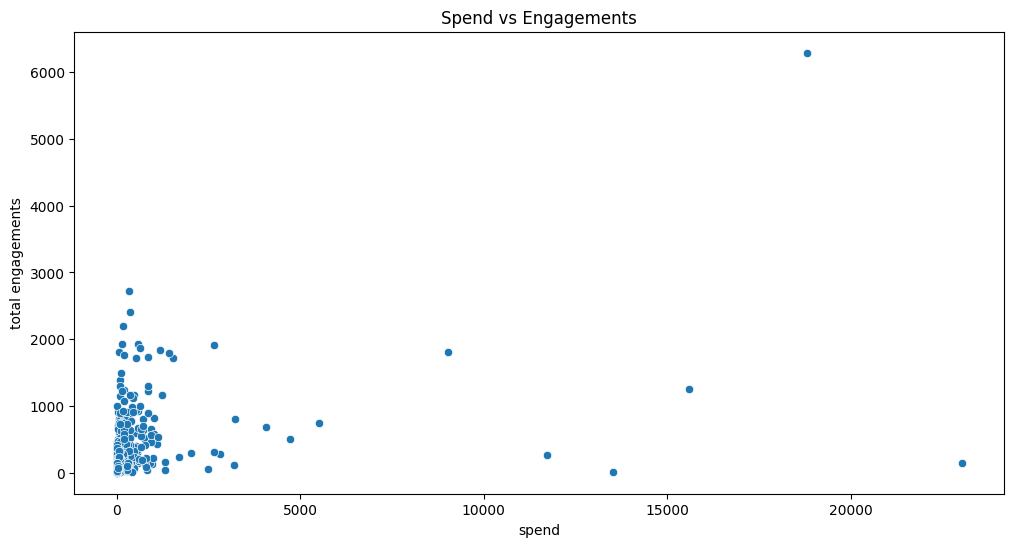

In [14]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='spend', y='total engagements')
plt.title("Spend vs Engagements")
plt.show()

In [19]:
df.columns

Index(['date', 'company name', 'spend', 'impressions', 'likecount',
       'commentcount', 'repostcount', 'total engagements', 'conversion',
       'action', 'type', 'posturl', 'postcontent', 'profileurl', 'videourl',
       'sharedposturl', 'created_at', 'size', 'url', 'number of faces',
       'face emotion', 'face position', 'face area percentage %', 'objects',
       'number of objects', 'primary object', 'primary object position',
       'primary object area percentage %', 'secondary object',
       'secondary object position', 'secondary object area percentage %',
       'text', 'text length', 'dominant colour', 'cta', 'logos', 'logo 1 name',
       'logo 1 position', 'logo 1 area percentage %', 'logo 2 name',
       'logo 2 position', 'logo 2 area percentage %', 'number of persons',
       'person area %', 'person area', 'style', 'tone', 'voice', 'sentiment',
       'text area %', 'empty space %', 'topic', 'language', '# faces',
       '# persons', '# objects', '# text length'],

# Time series analysis

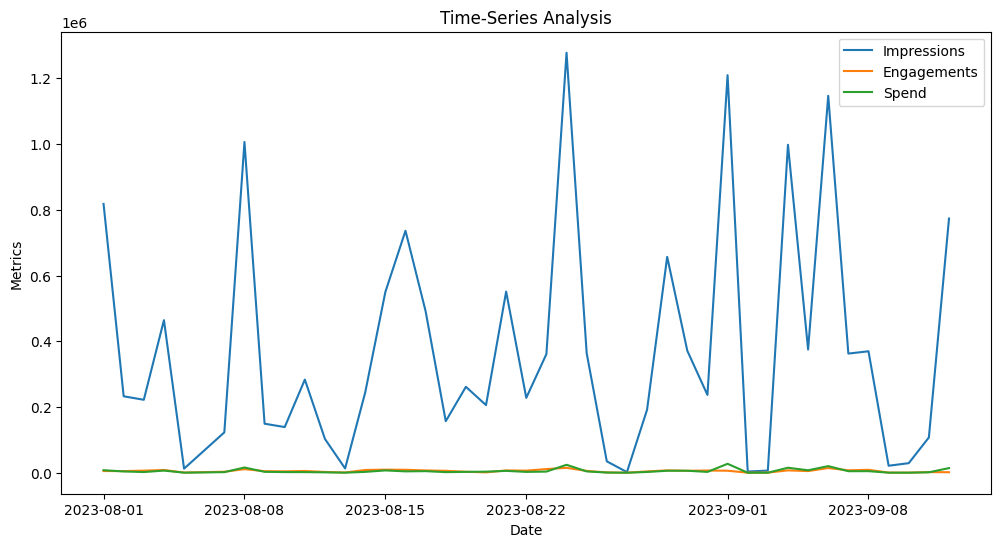

In [20]:
# Convert the date column to a datetime format
df['date'] = pd.to_datetime(df['date'])

# Group data by date and calculate daily performance metrics
daily_metrics = df.groupby('date')[['impressions', 'total engagements', 'spend']].sum()

# Visualize time series data
plt.figure(figsize=(12, 6))
plt.plot(daily_metrics.index, daily_metrics['impressions'], label='Impressions')
plt.plot(daily_metrics.index, daily_metrics['total engagements'], label='Engagements')
plt.plot(daily_metrics.index, daily_metrics['spend'], label='Spend')
plt.title("Time-Series Analysis")
plt.xlabel("Date")
plt.ylabel("Metrics")
plt.legend()
plt.show()


# Text data analysis

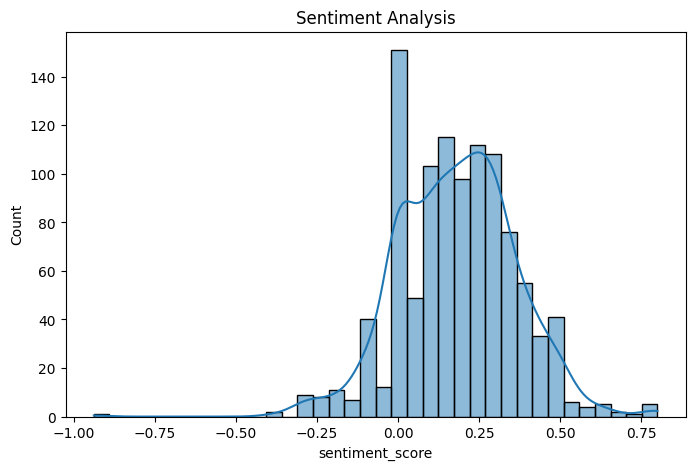

In [22]:
from textblob import TextBlob

# Calculate sentiment scores for the 'postcontent' column
df['sentiment_score'] = df['postcontent'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='sentiment_score', kde=True)
plt.title("Sentiment Analysis")
plt.show()


In [25]:
# Convert the 'created_at' column to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Now, you can use the .dt accessor for day of the week and hour
df['day_of_week'] = df['created_at'].dt.day_name()
df['hour'] = df['created_at'].dt.hour





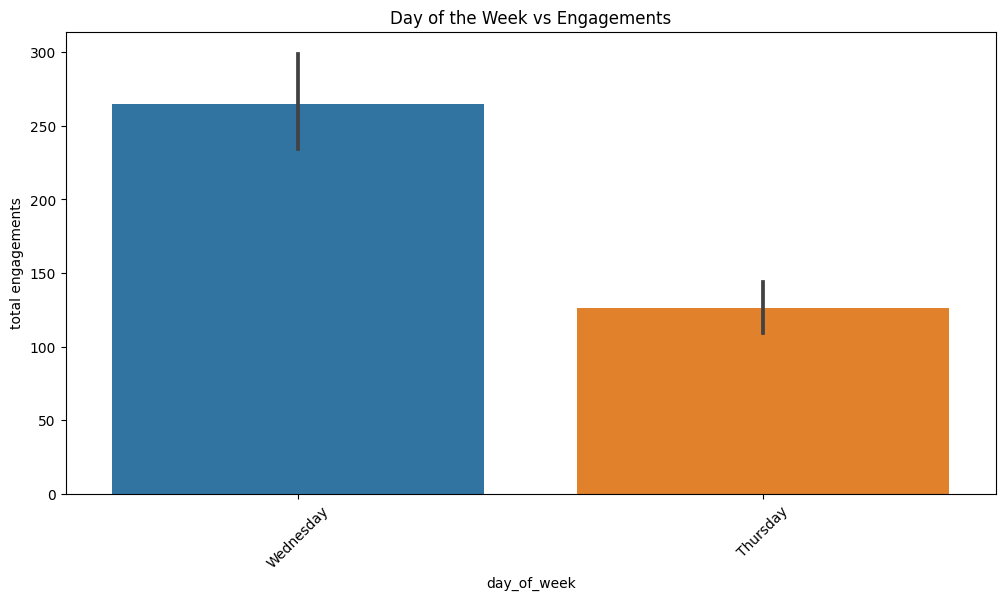

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='day_of_week', y='total engagements')
plt.title("Day of the Week vs Engagements")
plt.xticks(rotation=45)
plt.show()

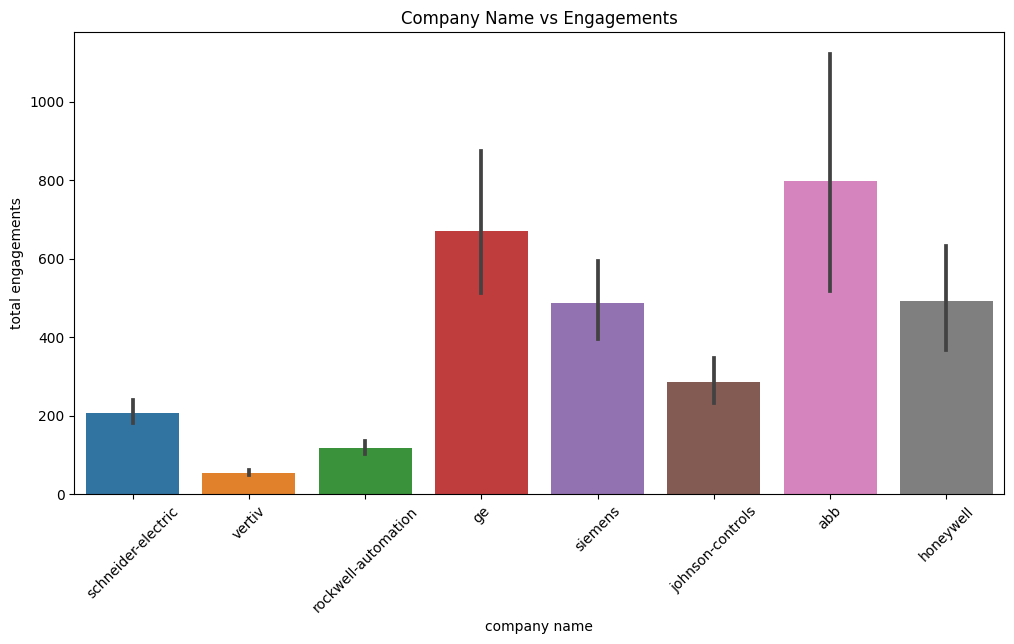

In [28]:
# Visualize engagements by company name
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='company name', y='total engagements')
plt.title("Company Name vs Engagements")
plt.xticks(rotation=45)
plt.show()


# multi variate analysis

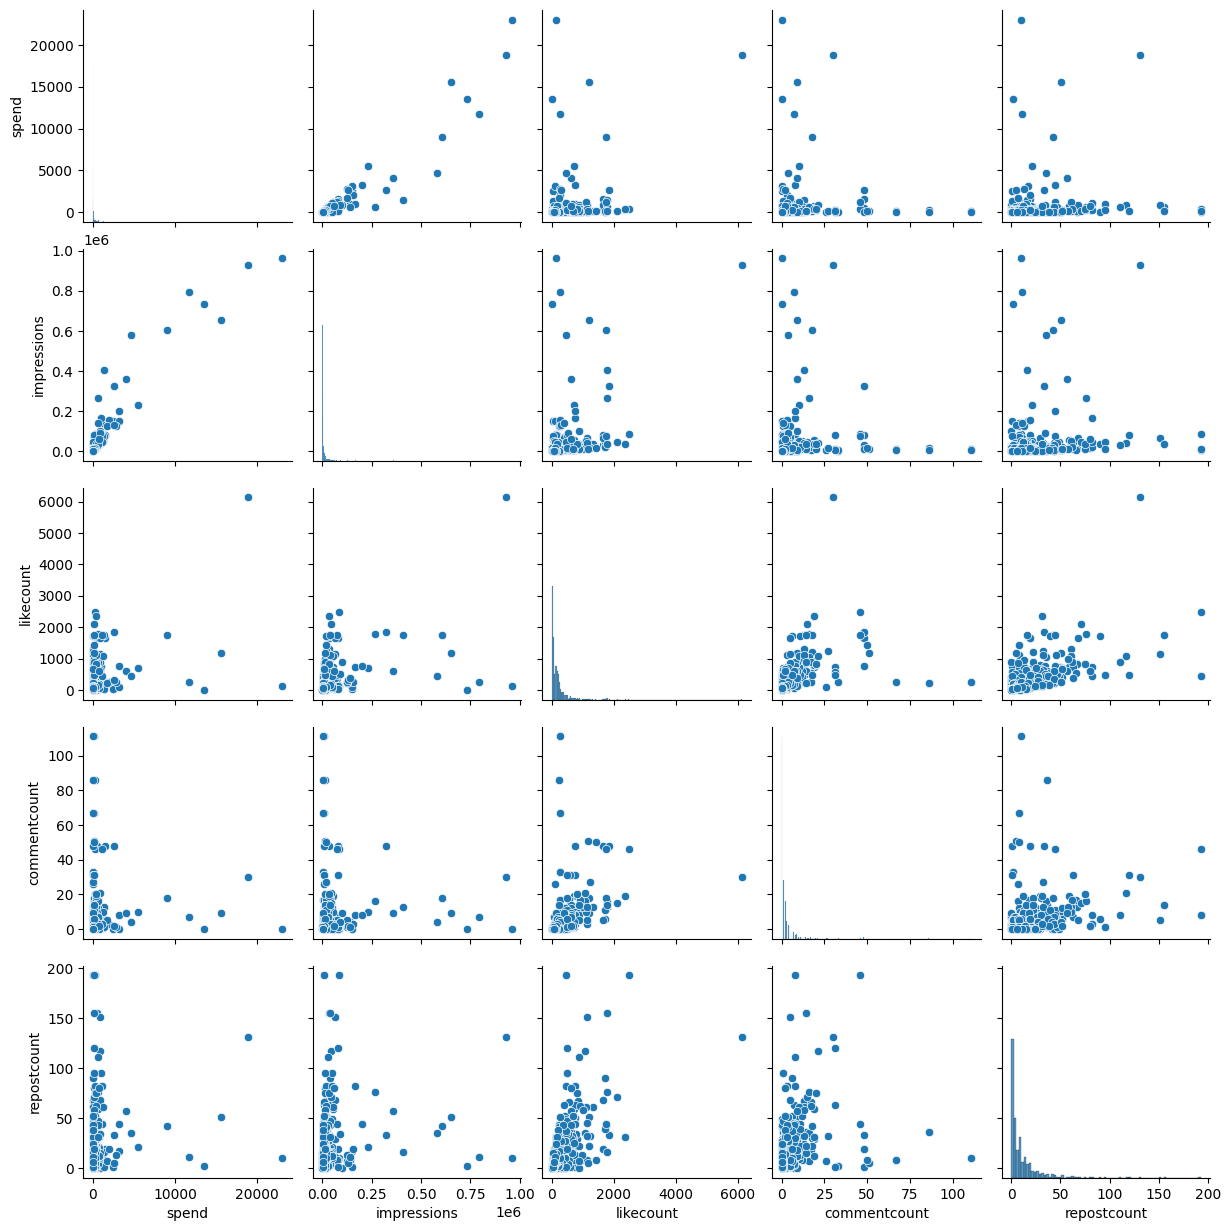

In [29]:
# Pairwise scatter plot for numerical features
sns.pairplot(df[['spend', 'impressions', 'likecount', 'commentcount', 'repostcount']])
plt.show()


# outlier detection

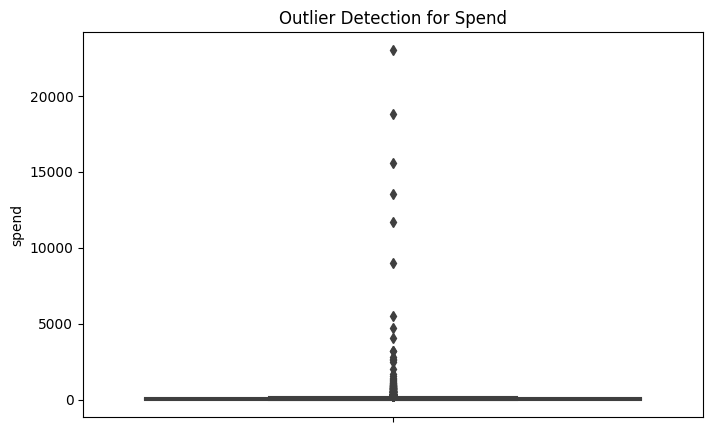

In [30]:
# Box plot to identify outliers in spend
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='spend')
plt.title("Outlier Detection for Spend")
plt.show()


# Text data analysis

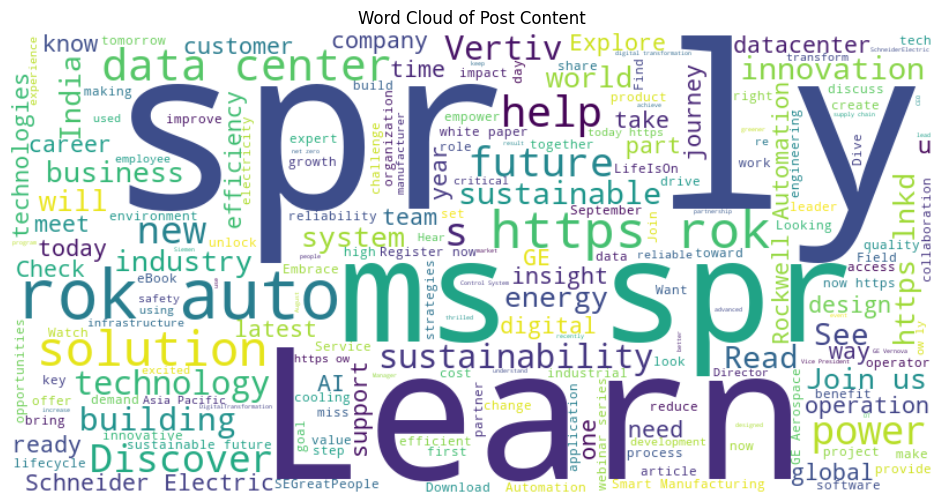

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Create a word cloud to visualize frequent words in text data
text_data = " ".join(df['postcontent'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Post Content")
plt.axis('off')
plt.show()

# Perform topic modeling if the dataset is large and text content is substantial


# Geospatial Analysis

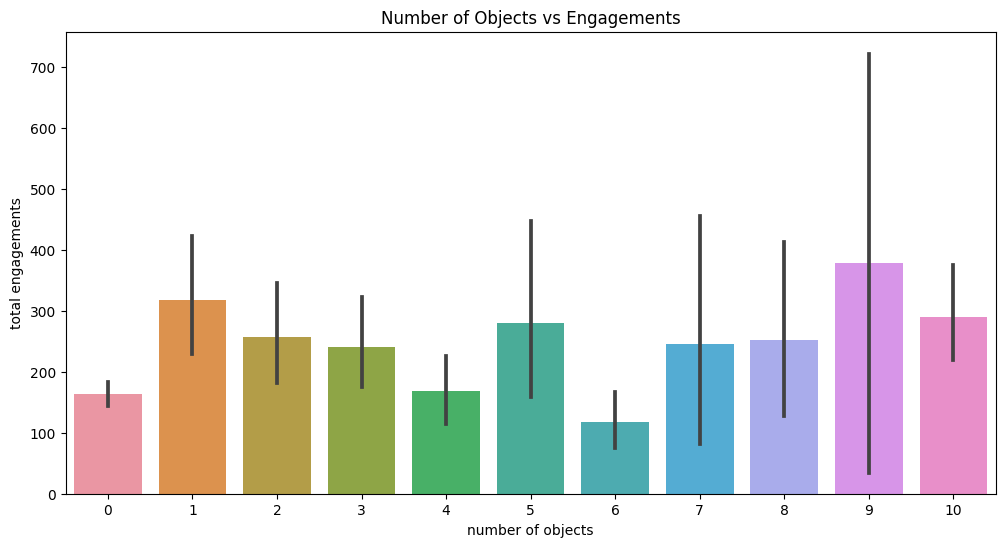

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='number of objects', y='total engagements')
plt.title("Number of Objects vs Engagements")
plt.show()

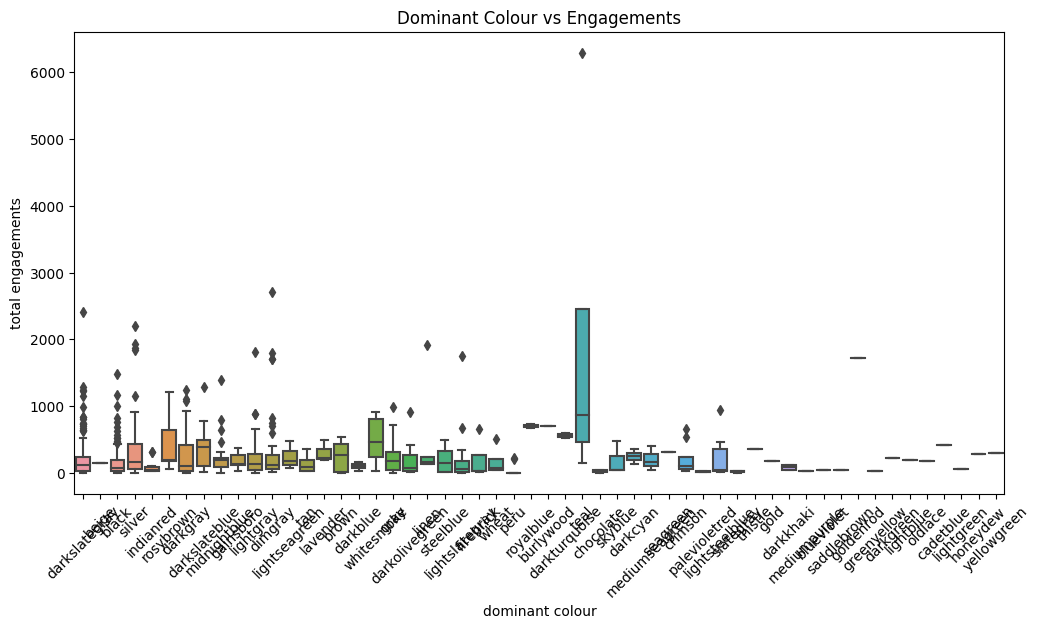

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='dominant colour', y='total engagements')
plt.title("Dominant Colour vs Engagements")
plt.xticks(rotation=45)
plt.show()

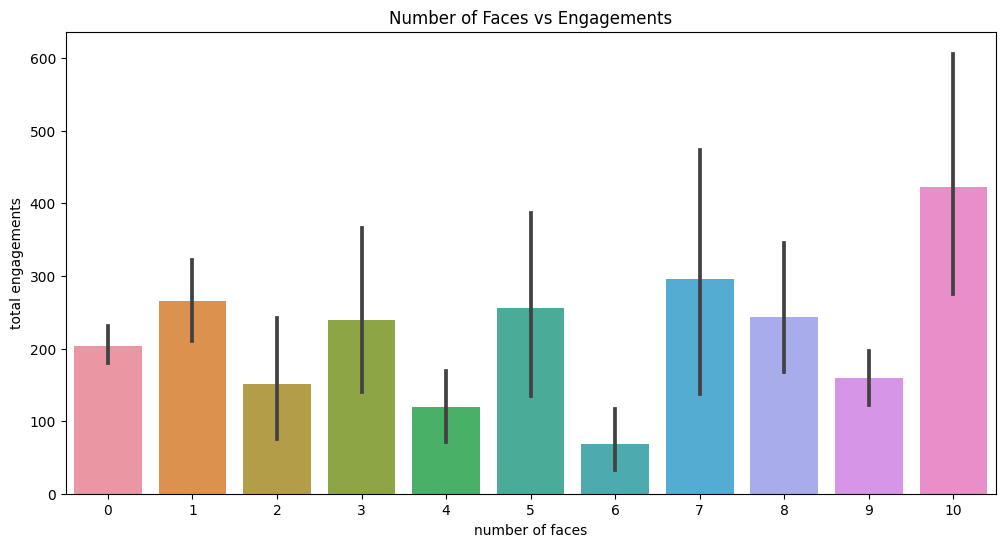

In [38]:
# Analyze the impact of the number of faces on engagements
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='number of faces', y='total engagements')
plt.title("Number of Faces vs Engagements")
plt.show()

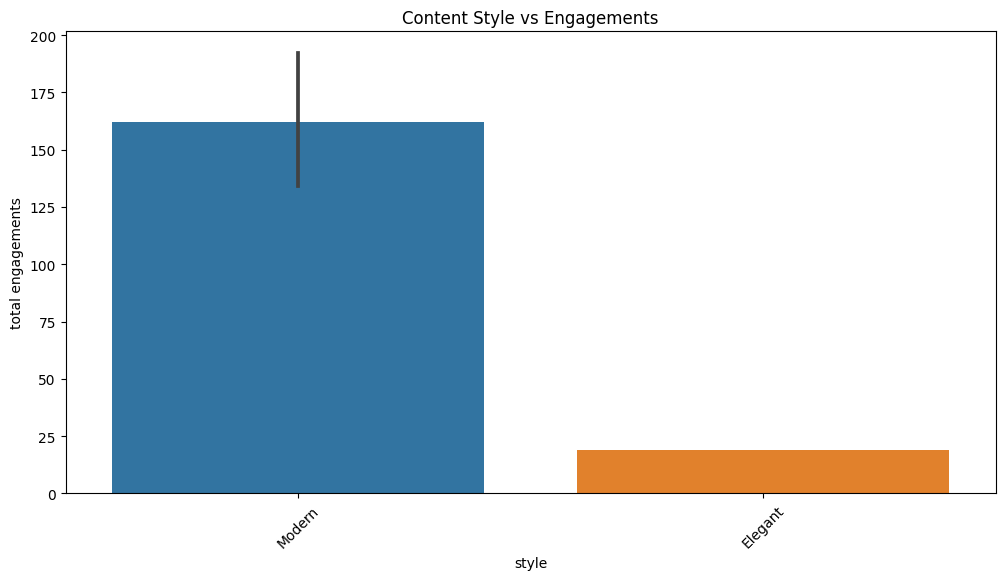

In [39]:
# Analyze the impact of content style on engagements
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='style', y='total engagements')
plt.title("Content Style vs Engagements")
plt.xticks(rotation=45)
plt.show()



# Preprocessing the data

In [40]:
df.isna().sum()

date                                     0
company name                             0
spend                                    0
impressions                              0
likecount                                0
commentcount                             0
repostcount                              0
total engagements                        0
conversion                               0
action                                   0
type                                     0
posturl                                  0
postcontent                              0
profileurl                               0
videourl                               833
sharedposturl                          810
created_at                               0
size                                     0
url                                     83
number of faces                          0
face emotion                           760
face position                          760
face area percentage %                   0
objects    

# selecting the important features

In [42]:
# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                1054 non-null   datetime64[ns]
 1   company name                        1054 non-null   object        
 2   spend                               1054 non-null   float64       
 3   impressions                         1054 non-null   int64         
 4   likecount                           1054 non-null   int64         
 5   commentcount                        1054 non-null   int64         
 6   repostcount                         1054 non-null   int64         
 7   total engagements                   1054 non-null   int64         
 8   conversion                          1054 non-null   int64         
 9   action                              1054 non-null   object        
 10  type                    